In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Results/Experiments/Gln-Glu-assay/Received_20230808/Gln-Glu-assay_result.tsv', sep='\t')
data['Cond'] = data['Diff'].astype(str)+'_'+data['Treat']
data_dict = {k: list(v) for k, v in data.groupby('Cond')['Glu/Gln']}

data = data[:13] # drop BPTES treated data

display(data_dict, data)

{'0_BPTES': [0.538358638, 0.636136247],
 '0_MSO': [1.667889391, 2.011549357],
 '0_none': [1.386485247, 1.920634921, 1.397727273],
 '4_BPTES': [0.554988718, 0.729556698],
 '4_MSO': [1.874015748, 1.904007045],
 '4_none': [0.42558106, 0.469079719, 0.484870849],
 '8_none': [0.507310131, 0.777443609, 0.74204244]}

,Diff,Treat,Glu/Gln,Cond
0,0,none,1.386485,0_none
1,0,none,1.920635,0_none
2,0,none,1.397727,0_none
3,4,none,0.425581,4_none
4,4,none,0.469080,4_none
5,4,none,0.484871,4_none
6,8,none,0.507310,8_none
7,8,none,0.777444,8_none
8,8,none,0.742042,8_none
9,0,MSO,1.667889,0_MSO


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_51035/1985490615.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond", y="Glu/Gln",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_51035/1985490615.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Cond", y="Glu/Gln",


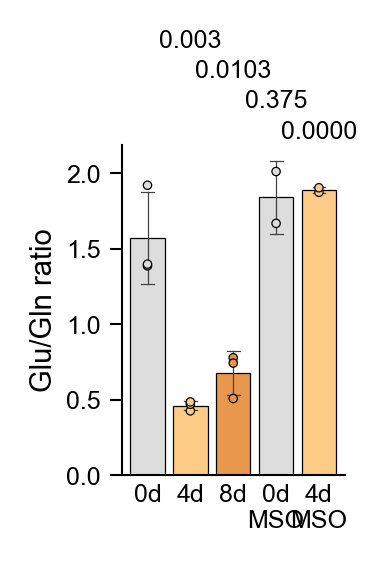

<Figure size 640x480 with 0 Axes>

In [14]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*5 +1/70*2]
height_ratios = [1.1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=data, x="Cond", y="Glu/Gln",
            palette=['#DDDDDD','#FFCC88','#E8974D','#DDDDDD','#FFCC88'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=data, x="Cond", y="Glu/Gln",
              palette=['#DDDDDD','#FFCC88','#E8974D','#DDDDDD','#FFCC88'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)

ax.set_xlim(-0.6, 4.6)
ax.set_xticks([*range(5)])
ax.set_xticklabels(['0d','4d','8d','0d\nMSO','4d\nMSO'], rotation=0)
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=2)

ax.set_xlabel('')
ax.set_ylabel('Glu/Gln ratio', labelpad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Unpaired T-test
from scipy import stats

stat, pv = stats.ttest_ind(data_dict['0_none'], data_dict['4_none'])
ax.text(1, 2.8, f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_ind(data_dict['0_none'], data_dict['8_none'])
ax.text(2, 2.6, f'{pv:.4f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_ind(data_dict['0_none'], data_dict['0_MSO'])
ax.text(3, 2.4, f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_ind(data_dict['4_none'], data_dict['4_MSO'])
ax.text(4, 2.2, f'{pv:.4f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)


## Show and save the plot
plt.savefig('Glu-Gln-assay_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()